# Employee Promotion Prediction

Employee Promotion means the ascension of an employee to higher ranks, this aspect of the job is what drives employees the most. The ultimate reward for dedication and loyality towards an organization and HR team plays and other attributes avalible.

The HR team in JMD company stored data of promotion cycle last year, which consists of details of all the employees in the company working last year also.
if they got promoted ir not, byt every time this process gets delayed due to so many details avalible for each employee. 

so our main focus is to make a model that will predict if a person is eligible for promotion or not.

## Objective

1. Explore and visualize the dataset
2. build classification model to predict if a employee has higher probability of getting promotion
3. Optimize the model using appropriate techniques


In [1]:
#!conda install xgboost


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV


from xgboost import XGBClassifier

from sklearn.metrics import f1_score, accuracy_score, precision_score, confusion_matrix, roc_auc_score, plot_confusion_matrix
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading datasets with first five data
df = pd.read_csv('employee_promotion.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [4]:
# making a copy of the data
data = df.copy()

In [5]:
df.shape

(54808, 13)

In [6]:
round(data.isnull().sum()/ data.isnull().count()*100, 2)

employee_id             0.00
department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.52
length_of_service       0.00
awards_won              0.00
avg_training_score      4.67
is_promoted             0.00
dtype: float64

1. there is about  4.4 percent percent education data missing 
2. on previous year rating 7.52   percent data missing
3. avg training score   4.67 percent data is missing

<AxesSubplot:>

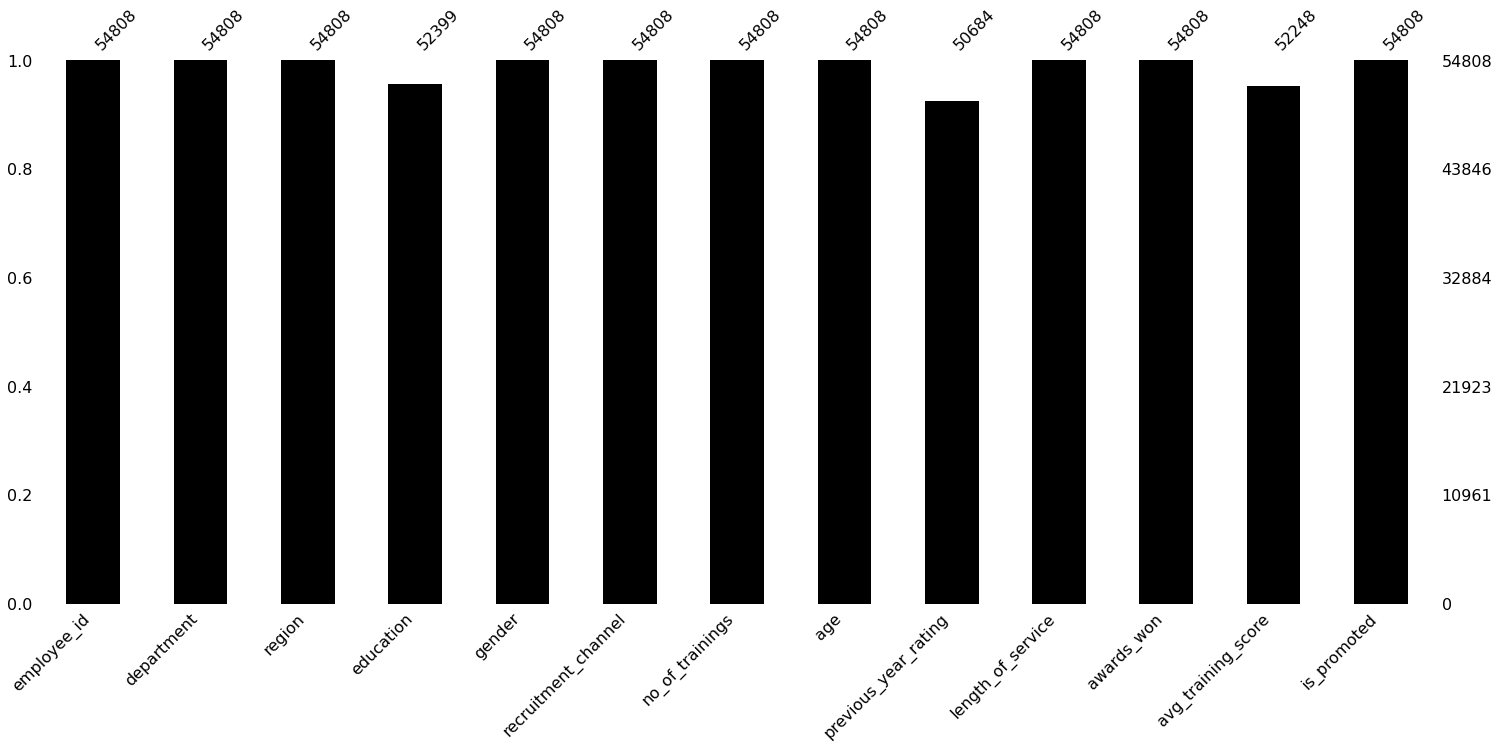

In [7]:
msno.bar(data, color = 'black')

***on education 2409, previous year ratings 4124 and avg training score 2560 data is missing ***

In [8]:
#data size 
print(f'there is {data.shape[0]} rows and {data.shape[1]} columns in this datasets') 

there is 54808 rows and 13 columns in this datasets


In [9]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


1. there is 5 columns are object and rest are numerical

2. there is some null values in some columns

In [10]:
#data describe()
data.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
awards_won,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,52248.0,63.712238,13.521910,39.0,51.00,60.0,77.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


1. employee_id - unique id for the employee , it wont help in our analysing we can drop it 
2. no_of_training : number of other training compleated in the previous year . max year is 7 most of the employee have 1  year of other training
3. age - age of employee . average age of te employee is 35 most of them age around 37
4. previous_year_rating - employee rating on average in previous year 3.33. max is 5 
5. length_of_service - 37 year is max and min 1

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [12]:
obj_col = ['department', 'religion', 'education', 'gender', 'recruitment_channel']


In [13]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in department are :
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64
**************************************************
Unique values in region are :
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
reg

1. majority of the employee works on sales and marketing department 
2. most of the employee have bachelors degree 

In [14]:
data.previous_year_rating.value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

## Feature Engineering

<AxesSubplot:>

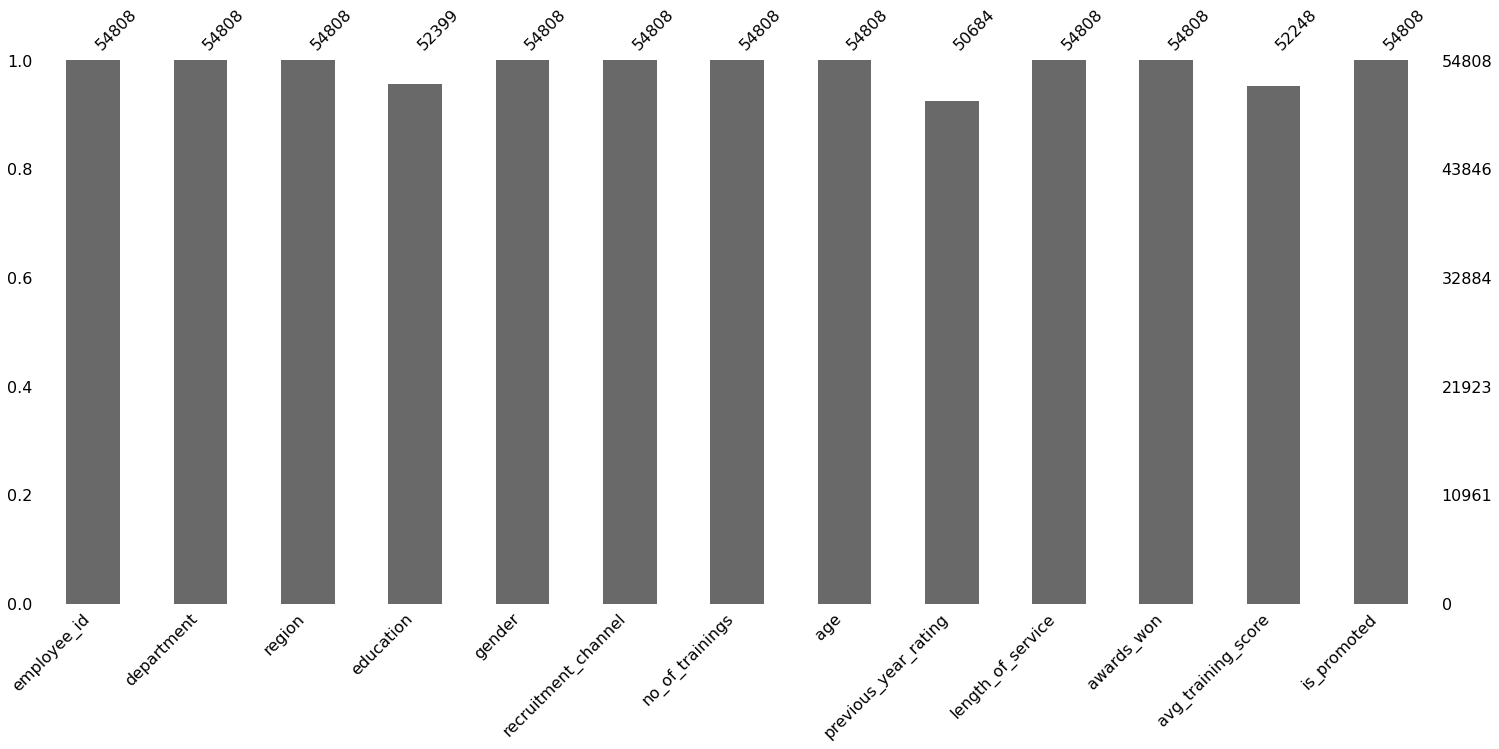

In [15]:
msno.bar(data)

### Missing value treatment



#### Previous_year_rating

***Previous year data with missing value but entried this year dataset. that might be because of they were new employee. i will also check data with their length of service to check their experience if they worked last year and that will solve why the data was missing***


In [16]:
#fill missing value with 0
data.previous_year_rating.fillna(0, inplace = True)

In [17]:
data[data['previous_year_rating'] == 0]['length_of_service'].value_counts()

1    4124
Name: length_of_service, dtype: int64

***mystery solved. there were 4124 data  missing.so we can colclude that null value of previous rating was new employees so i replace with 0 means with 0 year experience***

#### avg_training_score

***There is some missing value on avarage training score. frist i will check with length of service how long they were working for the company so if they have 0 year with the company that means they are newest employee so having training score doesnt make any sense***

In [18]:
data[data.avg_training_score.isnull()].head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
31,58536,Finance,region_31,Bachelor's,m,other,2,26,1.0,2,0,NaN,0
67,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,0.0,1,0,NaN,1


***with the missing data of training score there seems to have no relation with the other data and there is about 2600 data missing. i will replace missing data with mean of ***

In [19]:
#replacing missing data with mean of the data
data.avg_training_score.fillna((np.mean(data.avg_training_score)), inplace = True)


### Education

***There is about 4.4 percent of education data is missing.1st i will check if there any relationsip with the other data with missing data on education***

In [20]:
data[data['education'].isnull()].head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,0.0,1,0,77.0,0
21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,57.0,0


***No relation with other data. so i will replace the nan value with unknown. ***

In [21]:
#replacing nan value with unknown
data.education.fillna('unknown', inplace = True)

### Employee id


***dropping employee id because its unique value of identification and that wont help building model***

In [22]:
data.drop(columns = 'employee_id', inplace = True)

## EDA

In [23]:
# function for histogram boxplot
def histogram_boxplot(feature, figsize=(15,15), bins = None):
    
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='green') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'y') if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='red', linestyle='-') # Add median to the histogram
    
#source - great learning 

### Observation on Age

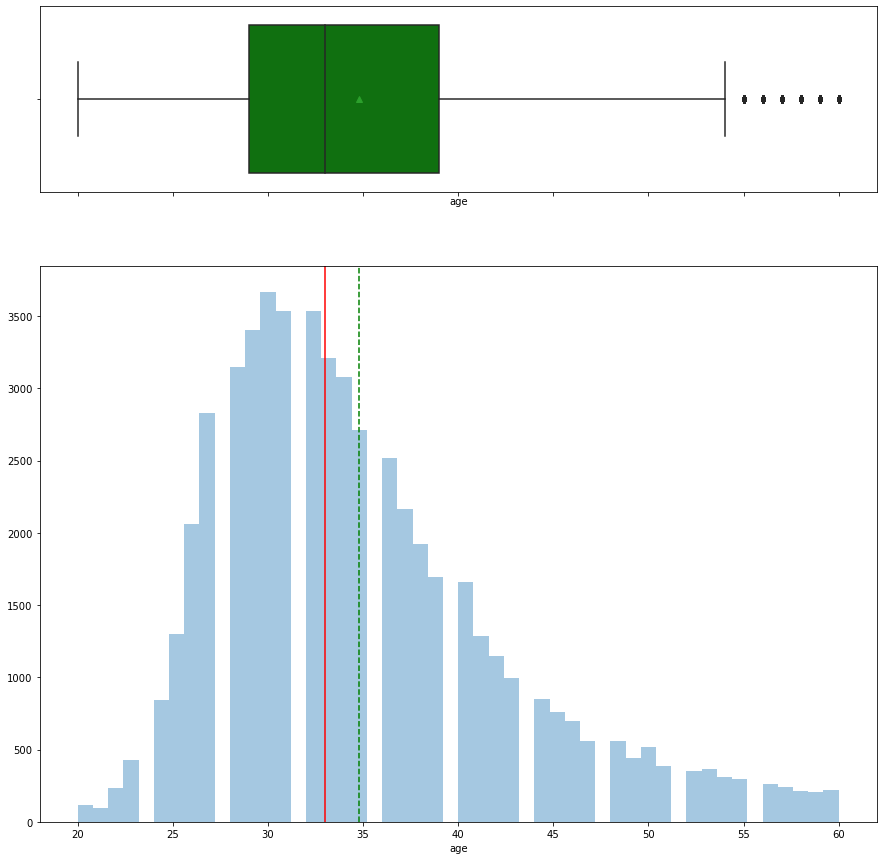

In [24]:
histogram_boxplot(data['age'])

1. normally distributed and mean 34 and median 33 years
2. no outlairs

### Observation on AVG_training_score


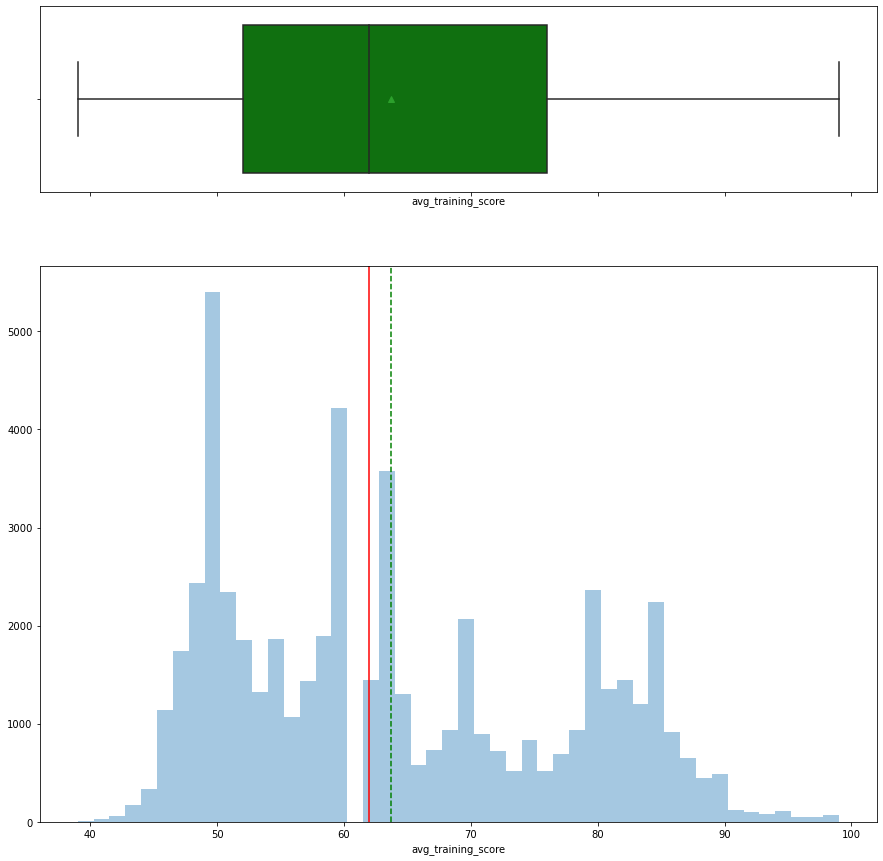

In [25]:
histogram_boxplot(data.avg_training_score)

1. mean of the avg training score are around 63 and median is 62
2. not that much outlair and not normally distributed

In [26]:
def perc_on_bar(feature):
    #source: Great Learning
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(10,5)})
    ax=sns.countplot(x=feature, data=df)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage
    
    plt.show()

### Observation on department

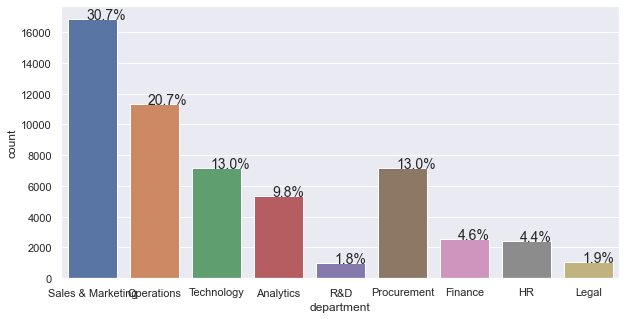

In [27]:
perc_on_bar(df['department'])

1. most of the employees are in sales and marketing department

### Observation on education

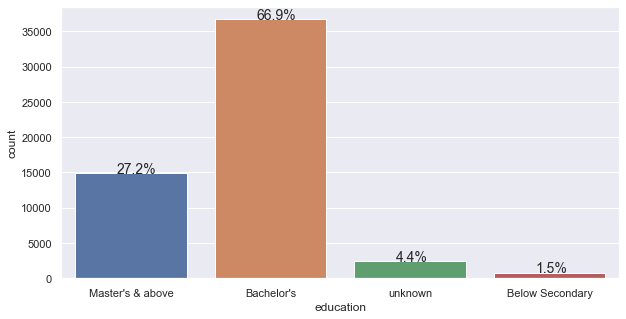

In [28]:
perc_on_bar(data.education)

1. about 67 percent employees have bachelors degree
2. 27 percent employees have masters and higher degree

### Observation on gender

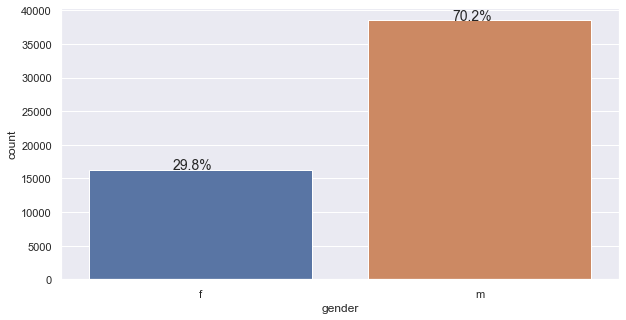

In [29]:
perc_on_bar(data.gender)

1. most of the employees are male

### Observation on recruitment channel

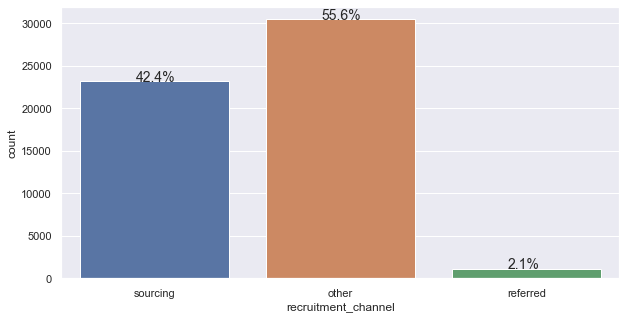

In [30]:
perc_on_bar(data.recruitment_channel)

1. most of the employee were hired from sourcing and from other recruitment channle like indeed

### Observation on No_of_training

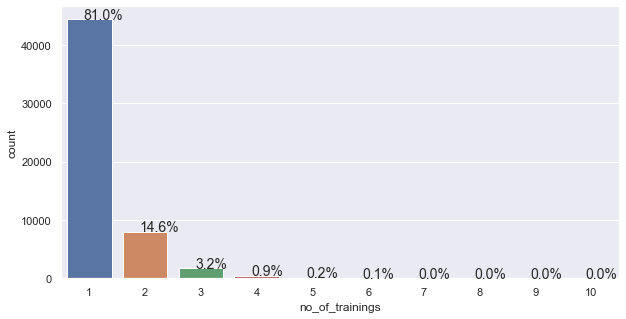

In [31]:
perc_on_bar(data.no_of_trainings)

1. most of the employee compleate one trianing in a single year

### Observation on previous_year_rating

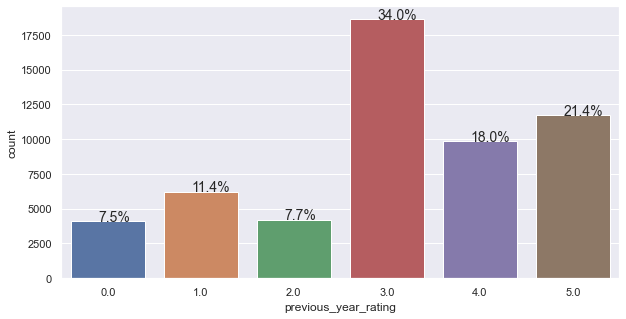

In [32]:
perc_on_bar(data.previous_year_rating)

1. last year rating was aroud 3 in most of the employee and about 21 percent employee did well. 

### Observation on length of service

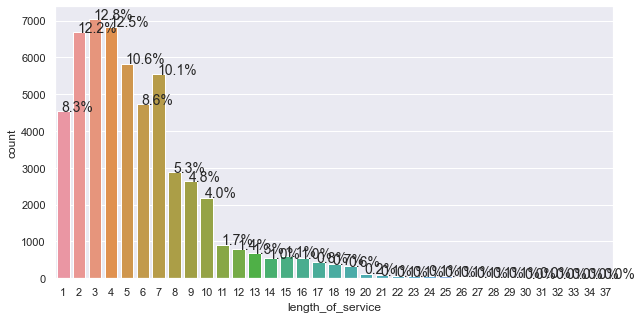

In [33]:
perc_on_bar(data.length_of_service)

1. most of the employee change their career within 7 years. very few of them stays in the company for long

### Observation on awards won


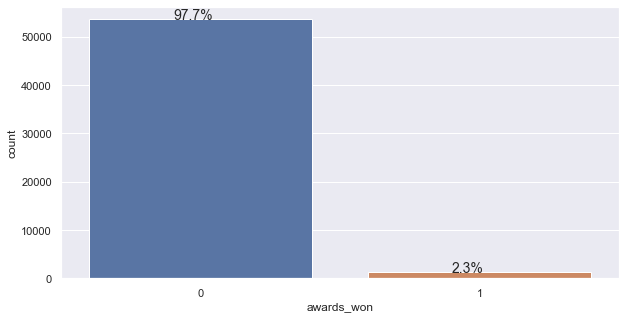

In [34]:
perc_on_bar(data.awards_won)

1. only 2.3 percent employee got award last year

### Observation on promotion

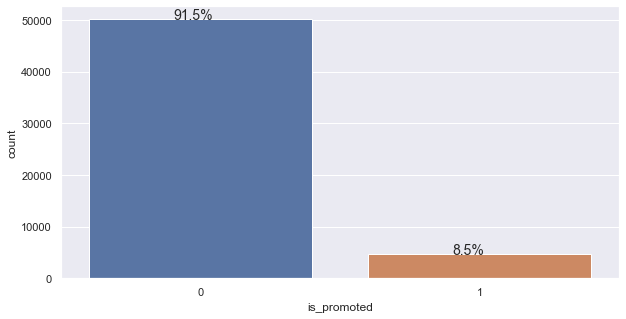

In [35]:
perc_on_bar(data.is_promoted)

1. only 8.5 percent people got promoted last year

## Bivariate Analysis

#### Heat Map

<AxesSubplot:>

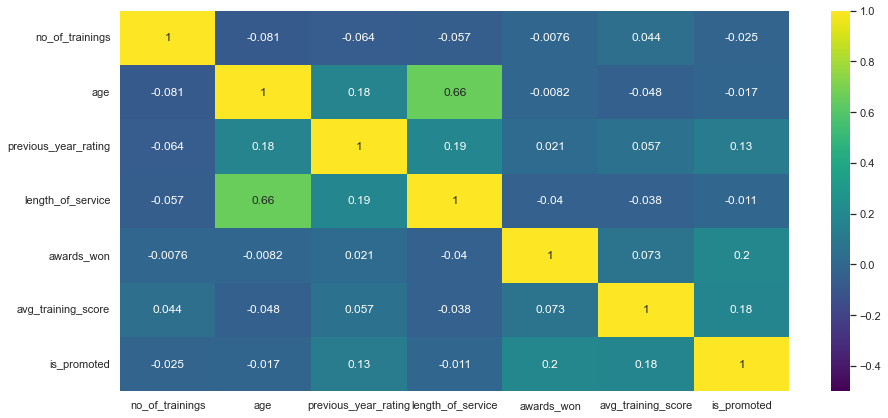

In [36]:
#heat map of the data
plt.figure(figsize = (15,7))
sns.heatmap(data.corr(), annot = True, vmin = -.5, cmap = 'viridis')

1. looks like avarage training score and previous year rating are slight corralated with target variable
2. length of service is highly corralated with age 
3. employee who got awards they have higher chance of getting promotion. 

#### Pairplot

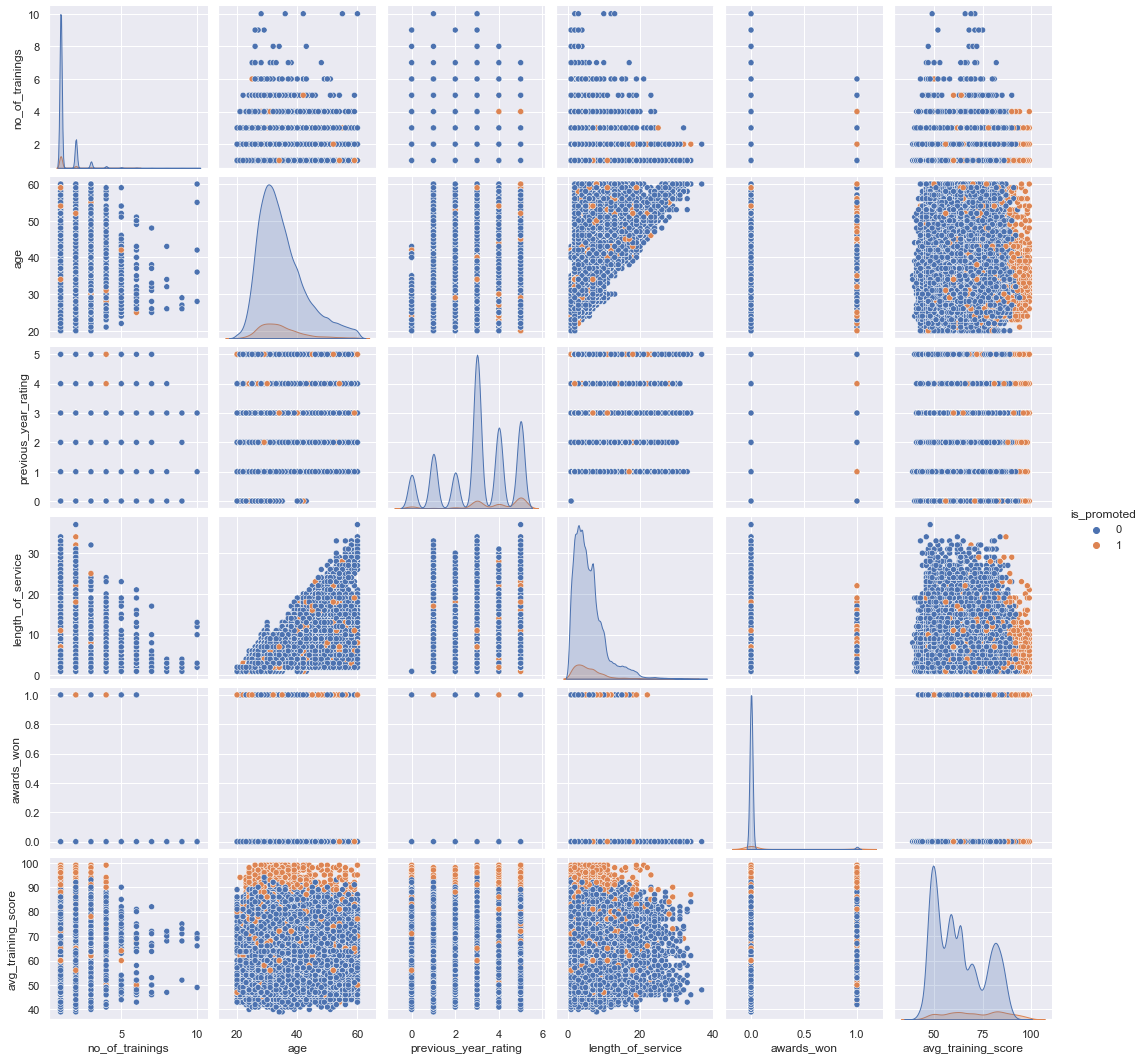

In [37]:
sns.pairplot(data = data, hue ='is_promoted' )

In [38]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x,flag=True):
    #source - Great Learning
    sns.set(palette='viridis')
    tab1 = pd.crosstab(x,data['is_promoted'],margins=True)
    if flag==True:
        print(tab1)
        print('-'*120)
    tab = pd.crosstab(x,data['is_promoted'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

### Promotion vs department

is_promoted            0     1    All
department                           
Analytics           4840   512   5352
Finance             2330   206   2536
HR                  2282   136   2418
Legal                986    53   1039
Operations         10325  1023  11348
Procurement         6450   688   7138
R&D                  930    69    999
Sales & Marketing  15627  1213  16840
Technology          6370   768   7138
All                50140  4668  54808
------------------------------------------------------------------------------------------------------------------------


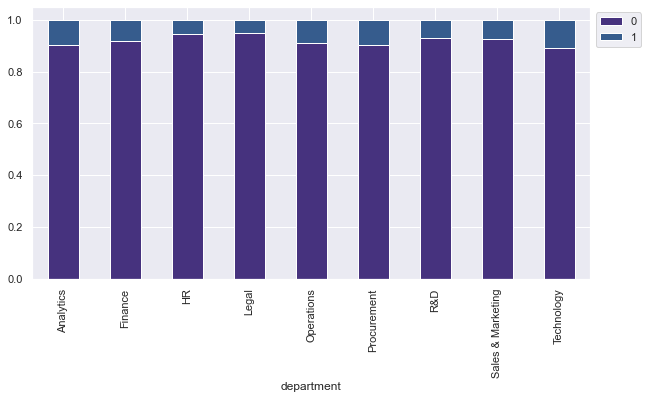

In [39]:
stacked_plot(data['department'] )

1. sales and marketing deparment got most of the promotion because most of the employee work on that department
2. finance dept have higher chances of promotion based on their employee number and promotion rate

### Promotion vs region

is_promoted      0     1    All
region                         
region_1       552    58    610
region_10      597    51    648
region_11     1241    74   1315
region_12      467    33    500
region_13     2418   230   2648
region_14      765    62    827
region_15     2586   222   2808
region_16     1363   102   1465
region_17      687   109    796
region_18       30     1     31
region_19      821    53    874
region_2     11354   989  12343
region_20      801    49    850
region_21      393    18    411
region_22     5694   734   6428
region_23     1038   137   1175
region_24      490    18    508
region_25      716   103    819
region_26     2117   143   2260
region_27     1528   131   1659
region_28     1164   154   1318
region_29      951    43    994
region_3       309    37    346
region_30      598    59    657
region_31     1825   110   1935
region_32      905    40    945
region_33      259    10    269
region_34      284     8    292
region_4      1457   246   1703
region_5

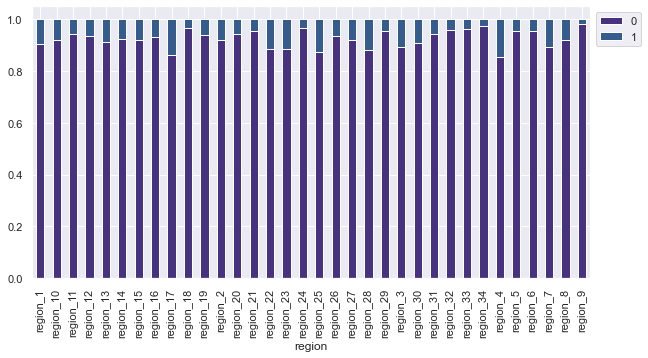

In [40]:
stacked_plot(data['region'])

### Promotion vs education

is_promoted           0     1    All
education                           
Bachelor's        33661  3008  36669
Below Secondary     738    67    805
Master's & above  13454  1471  14925
unknown            2287   122   2409
All               50140  4668  54808
------------------------------------------------------------------------------------------------------------------------


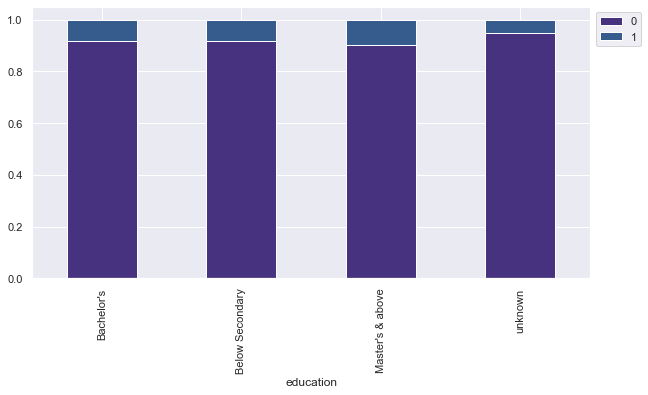

In [41]:
stacked_plot(data['education'])

1. masters and avobe degree with employee have higher chance of getting promoted

### Promotion vs gender

is_promoted      0     1    All
gender                         
f            14845  1467  16312
m            35295  3201  38496
All          50140  4668  54808
------------------------------------------------------------------------------------------------------------------------


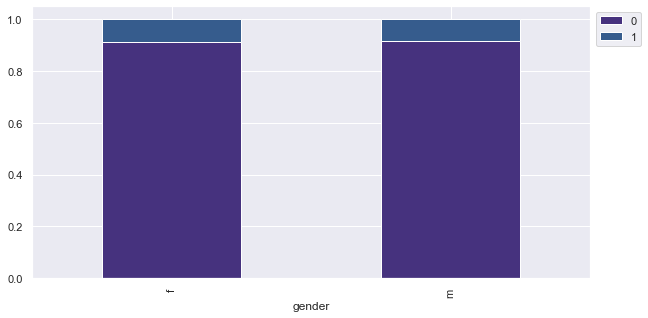

In [42]:
stacked_plot(data['gender'])

1. out of 14845 female 1467 got promoted
1. out of 35295 male 3201 got promoted last year

### Promotion vs recruitment channel

is_promoted              0     1    All
recruitment_channel                    
other                27890  2556  30446
referred              1004   138   1142
sourcing             21246  1974  23220
All                  50140  4668  54808
------------------------------------------------------------------------------------------------------------------------


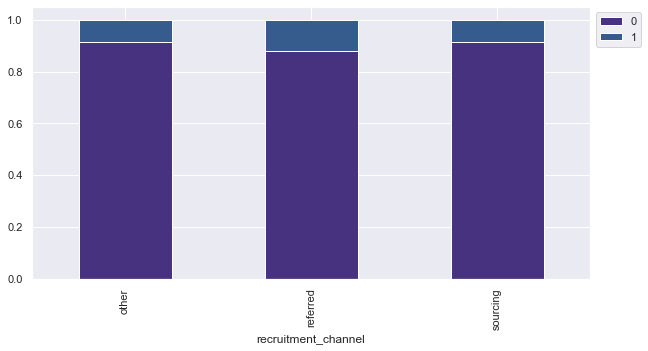

In [43]:
stacked_plot(data['recruitment_channel'])

reffered employee had higher chances on getting promoted

### Promotion vs no of training

is_promoted          0     1    All
no_of_trainings                    
1                40468  3910  44378
2                 7382   605   7987
3                 1654   122   1776
4                  442    26    468
5                  125     3    128
6                   42     2     44
7                   12     0     12
8                    5     0      5
9                    5     0      5
10                   5     0      5
All              50140  4668  54808
------------------------------------------------------------------------------------------------------------------------


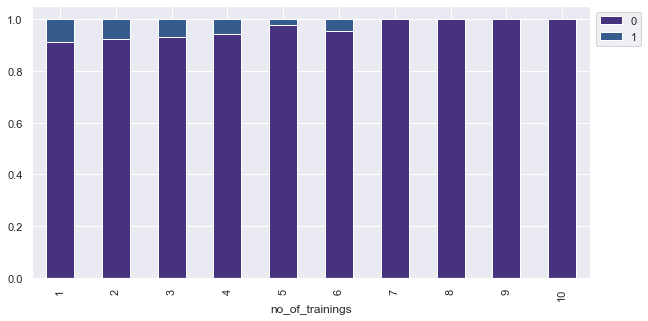

In [44]:
stacked_plot(data['no_of_trainings'])

### Promotion vs previous year rating

is_promoted               0     1    All
previous_year_rating                    
0.0                    3785   339   4124
1.0                    6135    88   6223
2.0                    4044   181   4225
3.0                   17263  1355  18618
4.0                    9093   784   9877
5.0                    9820  1921  11741
All                   50140  4668  54808
------------------------------------------------------------------------------------------------------------------------


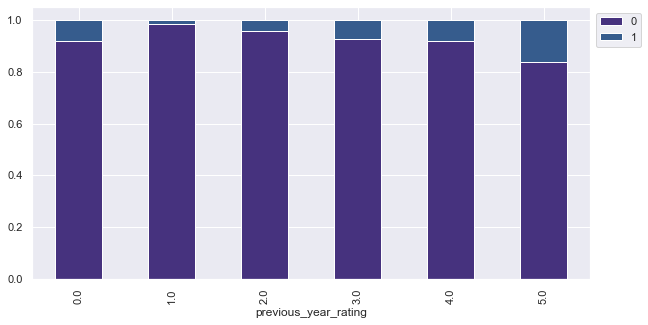

In [45]:
stacked_plot(data['previous_year_rating'])

1. from the data we can tell that employee who were promoted had higher ratings in previous year

### Promotion vs length of service

is_promoted            0     1    All
length_of_service                    
1                   4170   377   4547
2                   6089   595   6684
3                   6424   609   7033
4                   6238   598   6836
5                   5357   475   5832
6                   4333   401   4734
7                   5087   464   5551
8                   2614   269   2883
9                   2400   229   2629
10                  1989   204   2193
11                   820    96    916
12                   731    63    794
13                   633    54    687
14                   520    29    549
15                   550    43    593
16                   507    41    548
17                   406    26    432
18                   367    25    392
19                   297    32    329
20                   118    10    128
21                    74     4     78
22                    55     6     61
23                    58     7     65
24                    70     0     70
25          

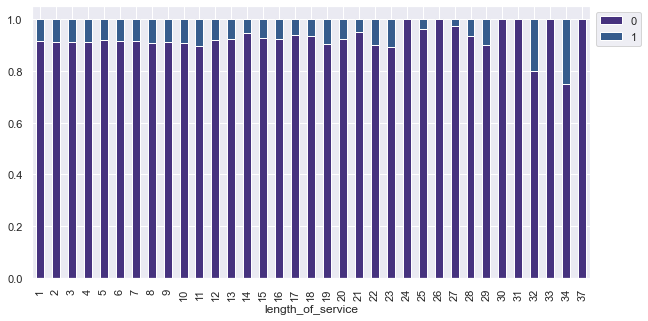

In [46]:
stacked_plot(data['length_of_service'])

### Promotion vs awards won

is_promoted      0     1    All
awards_won                     
0            49429  4109  53538
1              711   559   1270
All          50140  4668  54808
------------------------------------------------------------------------------------------------------------------------


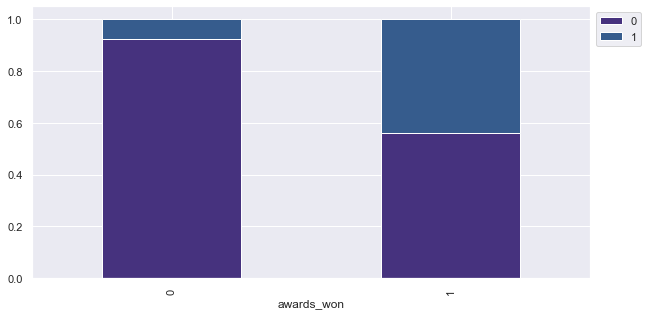

In [47]:
stacked_plot(data['awards_won'])

people who won aaward most of them were promoted last year

### Feature Engeniring

In [48]:
data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [49]:
# columns that need dummified
dum_col = ['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings','previous_year_rating', 'length_of_service',
       'awards_won']

In [50]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


In [51]:
data.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [52]:
from sklearn.preprocessing import LabelEncoder
# dummyfied the columns with label encoding

In [53]:
le = LabelEncoder()
data['department'] = le.fit_transform(data['department'])
data['education'] = le.fit_transform(data['education'])
data.region = le.fit_transform(data.region)
data.recruitment_channel = le.fit_transform(data.recruitment_channel)
data.gender = pd.get_dummies(data.gender, drop_first=True)

In [54]:
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,0,49.0,0
1,4,14,0,1,0,1,30,5.0,4,0,60.0,0
2,7,10,0,1,2,1,34,3.0,7,0,50.0,0
3,7,15,0,1,0,2,39,1.0,10,0,50.0,0
4,8,18,0,1,0,1,45,3.0,2,0,73.0,0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  int32  
 1   region                54808 non-null  int32  
 2   education             54808 non-null  int32  
 3   gender                54808 non-null  uint8  
 4   recruitment_channel   54808 non-null  int32  
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   awards_won            54808 non-null  int64  
 10  avg_training_score    54808 non-null  float64
 11  is_promoted           54808 non-null  int64  
dtypes: float64(2), int32(4), int64(5), uint8(1)
memory usage: 3.8 MB


In [56]:
data.education.value_counts()

0    36669
2    14925
3     2409
1      805
Name: education, dtype: int64

In [57]:
print(f'now there is {data.shape[1]} columns and {data.shape[0]}')

now there is 12 columns and 54808


### Model


In [58]:
from sklearn.model_selection import train_test_split, cross_val_score

X = data.drop(columns = 'is_promoted')
y = data.is_promoted

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42,test_size=.3)

In [59]:
y.value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

In [60]:
X_train.to_csv('sample_X.csv')

In [61]:
from sklearn.preprocessing import StandardScaler
# Scaling the data
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [62]:
X_train_sc.shape

(38365, 11)

In [63]:
X_train_sc[1]

array([ 1.20392119, -0.50347542, -0.68020072, -1.52444984, -0.88460142,
        1.23458389,  0.4147599 ,  0.61266823,  0.97388031, -0.15304069,
        1.15946534])

In [64]:
dd = pd.DataFrame(X_train_sc)
dd.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.804505,-1.302750,-0.680201,0.655974,-0.884601,-0.416218,-1.017475,-0.055639,-0.437284,-0.153041,-0.887050
1,1.203921,-0.503475,-0.680201,-1.524450,-0.884601,1.234584,0.414760,0.612668,0.973880,-0.153041,1.159465
2,-0.393742,-0.503475,-0.680201,0.655974,1.155784,-0.416218,-1.147679,-1.392252,-0.672478,-0.153041,-0.508065
3,0.804505,-0.160929,-0.680201,-1.524450,1.155784,-0.416218,-1.017475,-0.723945,-0.437284,-0.153041,-1.114440
4,0.005674,-0.503475,-0.680201,-1.524450,1.155784,-0.416218,-0.887272,-0.055639,-0.907672,-0.153041,0.174106


In [65]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    
    #source:- Great Learning
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train_sc)
    pred_test = model.predict(X_test_sc)
    
    train_acc = model.score(X_train_sc,y_train)
    test_acc = model.score(X_test_sc,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)
    
    train_f1 = f1_score(y_train, pred_train)
    test_f1 = f1_score(y_test, pred_test)
    
    train_acc = accuracy_score(y_train, pred_train)
    test_acc = accuracy_score(y_test, pred_test)
    
    crossval_train = cross_val_score(model, X_train_sc, y_train).mean()
    crossval_test = cross_val_score(model, X_test_sc, y_test).mean()
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_recall, test_recall, train_f1, test_f1,))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train_sc,y_train))
        print("Accuracy on test set : ",model.score(X_test_sc,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("Recall Score on traininig set : ", train_recall)
        print('Recall Score on testing set : ', test_recall)
        print('f1 score on train: ', train_f1)
        print('f1 score on test : ', test_f1)
        print('accurace score on train : ', train_acc)
        print('accurace score on test : ', test_acc)
        print('Cross val score on train : ', crossval_train)
        print('Cross val score on test : ', crossval_test)
    
    return score_list # returning the list with train and test scores

### Logistics Regression

In [66]:

logreg = LogisticRegression()
logreg.fit(X_train_sc, y_train)

LogisticRegression()

In [67]:
get_metrics_score(logreg)

Accuracy on training set :  0.9186758764498892
Accuracy on test set :  0.9185671714407346
Recall on training set :  0.07160342717258263
Recall on test set :  0.075
Precision on training set :  0.73125
Precision on test set :  0.7046979865771812
Recall Score on traininig set :  0.07160342717258263
Recall Score on testing set :  0.075
f1 score on train:  0.13043478260869568
f1 score on test :  0.13557133634602972
accurace score on train :  0.9186758764498892
accurace score on test :  0.9185671714407346
Cross val score on train :  0.9185455493288153
Cross val score on test :  0.9183240011865845


[0.9186758764498892,
 0.9185671714407346,
 0.07160342717258263,
 0.075,
 0.73125,
 0.7046979865771812,
 0.07160342717258263,
 0.075,
 0.13043478260869568,
 0.13557133634602972]

In [68]:
!conda install shap

^C


In [69]:
y

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

In [70]:

import shap
shap.initjs()

## Decision Tree

In [71]:
dt = DecisionTreeClassifier()
dt.fit(X_train_sc, y_train)

DecisionTreeClassifier()

In [72]:
get_metrics_score(dt)

Accuracy on training set :  0.9996090186367783
Accuracy on test set :  0.8814085020981572
Recall on training set :  0.9954100367197063
Recall on test set :  0.3985714285714286
Precision on training set :  1.0
Precision on test set :  0.3349339735894358
Recall Score on traininig set :  0.9954100367197063
Recall Score on testing set :  0.3985714285714286
f1 score on train:  0.9976997393037877
f1 score on test :  0.3639921722113503
accurace score on train :  0.9996090186367783
accurace score on test :  0.8814085020981572
Cross val score on train :  0.8795256092792909
Cross val score on test :  0.8738677143231254


[0.9996090186367783,
 0.8814085020981572,
 0.9954100367197063,
 0.3985714285714286,
 1.0,
 0.3349339735894358,
 0.9954100367197063,
 0.3985714285714286,
 0.9976997393037877,
 0.3639921722113503]

## Bagging

In [73]:
ba = BaggingClassifier()
ba.fit(X_train_sc, y_train)
get_metrics_score(ba)

Accuracy on training set :  0.9879838394369869
Accuracy on test set :  0.931825092744633
Recall on training set :  0.8613831089351285
Recall on test set :  0.3271428571428571
Precision on training set :  0.9971661353170386
Precision on test set :  0.7189952904238619
Recall Score on traininig set :  0.8613831089351285
Recall Score on testing set :  0.3271428571428571
f1 score on train:  0.924314562469217
f1 score on test :  0.44968090328915067
accurace score on train :  0.9879838394369869
accurace score on test :  0.931825092744633
Cross val score on train :  0.9324384204352926
Cross val score on test :  0.9280549187404153


[0.9879838394369869,
 0.931825092744633,
 0.8613831089351285,
 0.3271428571428571,
 0.9971661353170386,
 0.7189952904238619,
 0.8613831089351285,
 0.3271428571428571,
 0.924314562469217,
 0.44968090328915067]

## Boosting

In [74]:
ab = AdaBoostClassifier()
ab.fit(X_train_sc, y_train)

AdaBoostClassifier()

In [75]:
get_metrics_score(ab)

Accuracy on training set :  0.9256353447152352
Accuracy on test set :  0.9257434774676154
Recall on training set :  0.15758873929008568
Recall on test set :  0.1657142857142857
Precision on training set :  0.8373983739837398
Precision on test set :  0.8140350877192982
Recall Score on traininig set :  0.15758873929008568
Recall Score on testing set :  0.1657142857142857
f1 score on train:  0.26525882049961375
f1 score on test :  0.27537091988130563
accurace score on train :  0.9256353447152352
accurace score on test :  0.9257434774676154
Cross val score on train :  0.9252443633520135
Cross val score on test :  0.9262909469669228


[0.9256353447152352,
 0.9257434774676154,
 0.15758873929008568,
 0.1657142857142857,
 0.8373983739837398,
 0.8140350877192982,
 0.15758873929008568,
 0.1657142857142857,
 0.26525882049961375,
 0.27537091988130563]

## Gradient Boosting Classifier

In [76]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_sc, y_train)

GradientBoostingClassifier()

In [77]:
get_metrics_score(gbc)

Accuracy on training set :  0.935227420826274
Accuracy on test set :  0.9346834519248313
Recall on training set :  0.2552019583843329
Recall on test set :  0.24928571428571428
Precision on training set :  0.9423728813559322
Precision on test set :  0.9381720430107527
Recall Score on traininig set :  0.2552019583843329
Recall Score on testing set :  0.24928571428571428
f1 score on train:  0.40163737057548754
f1 score on test :  0.39390519187358913
accurace score on train :  0.935227420826274
accurace score on test :  0.9346834519248313
Cross val score on train :  0.934263000130327
Cross val score on test :  0.9331632241660804


[0.935227420826274,
 0.9346834519248313,
 0.2552019583843329,
 0.24928571428571428,
 0.9423728813559322,
 0.9381720430107527,
 0.2552019583843329,
 0.24928571428571428,
 0.40163737057548754,
 0.39390519187358913]

## Random Forest Classifier

In [78]:
%%time
rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)
get_metrics_score(rf)

Accuracy on training set :  0.9995829532125635
Accuracy on test set :  0.9317642765918628
Recall on training set :  0.9954100367197063
Recall on test set :  0.2507142857142857
Precision on training set :  0.9996926859250154
Precision on test set :  0.8278301886792453
Recall Score on traininig set :  0.9954100367197063
Recall Score on testing set :  0.2507142857142857
f1 score on train:  0.9975467647960748
f1 score on test :  0.3848684210526316
accurace score on train :  0.9995829532125635
accurace score on test :  0.9317642765918628
Cross val score on train :  0.9311612146487684
Cross val score on test :  0.9263519406648572
Wall time: 25.1 s


[0.9995829532125635,
 0.9317642765918628,
 0.9954100367197063,
 0.2507142857142857,
 0.9996926859250154,
 0.8278301886792453,
 0.9954100367197063,
 0.2507142857142857,
 0.9975467647960748,
 0.3848684210526316]

### XGBClassifier

In [79]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_sc, y_train)

[15:36:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

In [81]:
print('Expected Value: ', explainer.expected_value)

Expected Value:  -2.647296


In [82]:
shap_values = shap_values.astype(int)

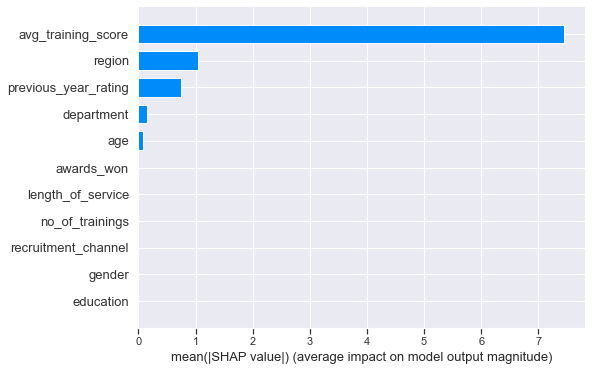

In [83]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [91]:
shap_values

array([[ 0, -1,  0, ...,  0,  0,  7],
       [ 0, -1,  0, ...,  0,  0,  8],
       [ 0,  0,  0, ...,  0,  0,  8],
       ...,
       [ 0, -1,  0, ...,  0,  0,  7],
       [ 0, -1,  0, ...,  0,  0,  8],
       [ 1, -2,  0, ...,  0,  0,  8]])

In [94]:
#shap.summary_plot(shap_values[0], X_test)

AssertionError: Summary plots need a matrix of shap_values, not a vector.

In [86]:
get_metrics_score(xgb)

[15:43:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:43:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[0.9473999739345758,
 0.9405826187435383,
 0.39167686658506734,
 0.3414285714285714,
 0.9770992366412213,
 0.8968105065666041,
 0.39167686658506734,
 0.3414285714285714,
 0.5591961555264309,
 0.4945680289705121]


###  Gradiend Boost, XGBClassifier and adaBoost Perform Well


#### tuned XGBClassifier

In [87]:
%%time 
from xgboost import XGBClassifier
# defining model
xgb = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,300,50),'scale_pos_weight':[0,1,2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05], 'gamma':[0,1,3,5],
            'subsample':[0.7,0.8,0.9,1]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
#scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=50, n_jobs = -1,  cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_sc,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 100, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9407793561840219:
Wall time: 5min 33s


In [96]:
# getting the best score by using best parameter 
tuned_xgb1 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.8,
    scale_pos_weight=1,
    n_estimators=100,
    learning_rate=0.1,
    gamma=5,
)
tuned_xgb1.fit(X_train_sc, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
get_metrics_score(tuned_xgb1)

Accuracy on training set :  0.9413267300925322
Accuracy on test set :  0.9400960895213769
Recall on training set :  0.3274173806609547
Recall on test set :  0.3192857142857143
Precision on training set :  0.9528049866429208
Precision on test set :  0.9331941544885177
Recall Score on traininig set :  0.3274173806609547
Recall Score on testing set :  0.3192857142857143
f1 score on train:  0.4873605101343657
f1 score on test :  0.47578499201703034
accurace score on train :  0.9413267300925322
accurace score on test :  0.9400960895213769
Cross val score on train :  0.9407793561840219
Cross val score on test :  0.9378459237789609


[0.9413267300925322,
 0.9400960895213769,
 0.3274173806609547,
 0.3192857142857143,
 0.9528049866429208,
 0.9331941544885177,
 0.3274173806609547,
 0.3192857142857143,
 0.4873605101343657,
 0.47578499201703034]

#### Gradient Boost 

In [98]:
X_train_sc.shape

(38365, 11)

In [99]:

%%time
gbc = GradientBoostingClassifier(random_state=1)
# setting paramiter
param_gbc = {
    'init': [AdaBoostClassifier(random_state = 1), DecisionTreeClassifier(random_state=1)],
    'n_estimators': np.arange(75,150,25),
    'learning_rate': [0.1,0.01,0.05,1],
    'max_features': [0.5, 0.7, 1],
    'subsample':[0.5,0.7,1]
    
}
#scorer = metrics.make_scorer(metrics.recall_score)
# gridSearchCv
grid_gbc =RandomizedSearchCV(estimator=gbc,param_distributions=param_gbc,n_iter = 50,  random_state=1,n_jobs = -1, cv = 5)

# fitting grid Search on Training data
grid_gbc.fit(X_train_sc, y_train)
print("best parameters are{} with cv score = {}:" .format(grid_gbc.best_params_, grid_gbc.best_score_))

best parameters are{'subsample': 1, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 1, 'init': AdaBoostClassifier(random_state=1)} with cv score = 0.937807897823537:
Wall time: 2min 55s


In [100]:
tuned_gbm = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=100,
    max_features=0.7,
    learning_rate=1,
    init = AdaBoostClassifier(random_state=1)
    
)

tuned_gbm.fit(X_train_sc, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=1, max_features=0.7, random_state=1,
                           subsample=0.7)

In [101]:
get_metrics_score(tuned_gbm)

Accuracy on training set :  0.9407793561840219
Accuracy on test set :  0.9393662956881348
Recall on training set :  0.3430232558139535
Recall on test set :  0.3335714285714286
Precision on training set :  0.8996789727126806
Precision on test set :  0.879472693032015
Recall Score on traininig set :  0.3430232558139535
Recall Score on testing set :  0.3335714285714286
f1 score on train:  0.49667700487372624
f1 score on test :  0.48368720870015536
accurace score on train :  0.9407793561840219
accurace score on test :  0.9393662956881348
Cross val score on train :  0.9349407011599112
Cross val score on test :  0.929514180942299


[0.9407793561840219,
 0.9393662956881348,
 0.3430232558139535,
 0.3335714285714286,
 0.8996789727126806,
 0.879472693032015,
 0.3430232558139535,
 0.3335714285714286,
 0.49667700487372624,
 0.48368720870015536]

## AdaBoost

In [102]:

%%time
ada = AdaBoostClassifier()
# setting paramiter
param_ada = {
    
    'n_estimators': np.arange(10,110,10),
    'learning_rate': [0.1,0.01,0.2,0.05,1],
    'base_estimator':[
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}
#scorer = metrics.make_scorer(metrics.recall_score)
# gridSearchCv
grid_ada =RandomizedSearchCV(estimator=ada,param_distributions=param_ada,n_iter = 50,  random_state=1,n_jobs = -1, cv = 5)

# fitting grid Search on Training data
grid_ada.fit(X_train_sc, y_train)
print("best parameters are{} with cv score = {}:" .format(grid_ada.best_params_, grid_ada.best_score_))

best parameters are{'n_estimators': 90, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with cv score = 0.9374690473087449:
Wall time: 2min 18s


In [103]:
tuned_ada = AdaBoostClassifier(
    n_estimators=90,
    learning_rate=.2,
    base_estimator = DecisionTreeClassifier(max_depth=3, random_state=1),
    random_state=1
    
    
)

tuned_ada.fit(X_train_sc, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=90, random_state=1)

In [104]:
get_metrics_score(tuned_ada)

Accuracy on training set :  0.9381467483383292
Accuracy on test set :  0.9357173265219242
Recall on training set :  0.2864137086903305
Recall on test set :  0.2621428571428571
Precision on training set :  0.9580348004094166
Precision on test set :  0.9386189258312021
Recall Score on traininig set :  0.2864137086903305
Recall Score on testing set :  0.2621428571428571
f1 score on train:  0.44098939929328623
f1 score on test :  0.4098269123394751
accurace score on train :  0.9381467483383292
accurace score on test :  0.9357173265219242
Cross val score on train :  0.9374429818845302
Cross val score on test :  0.9349268075624788


[0.9381467483383292,
 0.9357173265219242,
 0.2864137086903305,
 0.2621428571428571,
 0.9580348004094166,
 0.9386189258312021,
 0.2864137086903305,
 0.2621428571428571,
 0.44098939929328623,
 0.4098269123394751]

#### OverSampling Train Data

In [105]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique6
X_train_over, y_train_over = sm.fit_resample(X_train_sc, y_train)

In [106]:
X_train_over.shape

(70194, 11)

In [107]:
X_train_over.shape

(70194, 11)

#### XGBClassifier on Oversample Train Data

In [108]:
tuned_xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.8,
    scale_pos_weight=1,
    n_estimators=100,
    learning_rate=0.1,
    gamma=5,
)
tuned_xgb2.fit(X_train_over, y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [109]:
get_metrics_score(tuned_xgb2)

Accuracy on training set :  0.932855467222729
Accuracy on test set :  0.9289059174116645
Recall on training set :  0.3185434516523868
Recall on test set :  0.2935714285714286
Precision on training set :  0.7489208633093525
Precision on test set :  0.6954314720812182
Recall Score on traininig set :  0.3185434516523868
Recall Score on testing set :  0.2935714285714286
f1 score on train:  0.4469729497638471
f1 score on test :  0.41285786037167255
accurace score on train :  0.932855467222729
accurace score on test :  0.9289059174116645
Cross val score on train :  0.9407793561840219
Cross val score on test :  0.9378459237789609


[0.932855467222729,
 0.9289059174116645,
 0.3185434516523868,
 0.2935714285714286,
 0.7489208633093525,
 0.6954314720812182,
 0.3185434516523868,
 0.2935714285714286,
 0.4469729497638471,
 0.41285786037167255]

#### oversample train data on Gradient Boost

In [110]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=100,
    max_features=0.7,
    learning_rate=1,
    init = AdaBoostClassifier(random_state=1)
    
)

tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=1, max_features=0.7, random_state=1,
                           subsample=0.7)

In [111]:
get_metrics_score(tuned_gbm2)

Accuracy on training set :  0.934158738433468
Accuracy on test set :  0.9309736666058505
Recall on training set :  0.30936352509179926
Recall on test set :  0.2985714285714286
Precision on training set :  0.78984375
Precision on test set :  0.7320490367775832
Recall Score on traininig set :  0.30936352509179926
Recall Score on testing set :  0.2985714285714286
f1 score on train:  0.4445910290237467
f1 score on test :  0.4241501775748352
accurace score on train :  0.934158738433468
accurace score on test :  0.9309736666058505
Cross val score on train :  0.9349407011599112
Cross val score on test :  0.929514180942299


[0.934158738433468,
 0.9309736666058505,
 0.30936352509179926,
 0.2985714285714286,
 0.78984375,
 0.7320490367775832,
 0.30936352509179926,
 0.2985714285714286,
 0.4445910290237467,
 0.4241501775748352]

#### Oversample train data on adaboost

In [112]:
tuned_ada1 = AdaBoostClassifier(
       n_estimators=90,
    learning_rate=.2,
    base_estimator = DecisionTreeClassifier(max_depth=3, random_state=1),
    random_state=1
    
    
    
)

tuned_ada1.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=90, random_state=1)

In [113]:
get_metrics_score(tuned_ada1)

Accuracy on training set :  0.9338459533428907
Accuracy on test set :  0.933223864258347
Recall on training set :  0.23714810281517748
Recall on test set :  0.22785714285714287
Precision on training set :  0.9451219512195121
Precision on test set :  0.9494047619047619
Recall Score on traininig set :  0.23714810281517748
Recall Score on testing set :  0.22785714285714287
f1 score on train:  0.37915851272015655
f1 score on test :  0.36751152073732724
accurace score on train :  0.9338459533428907
accurace score on test :  0.933223864258347
Cross val score on train :  0.9374429818845302
Cross val score on test :  0.9349268075624788


[0.9338459533428907,
 0.933223864258347,
 0.23714810281517748,
 0.22785714285714287,
 0.9451219512195121,
 0.9494047619047619,
 0.23714810281517748,
 0.22785714285714287,
 0.37915851272015655,
 0.36751152073732724]

### Undersampling Trained Data

In [114]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train_sc, y_train)

In [115]:
X_train_un.shape


(6536, 11)

In [116]:
y_train_un.shape

(6536,)

#### XGBClassifier on undersample Train Data

In [117]:
tuned_xgb3 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.8,
    scale_pos_weight=1,
    n_estimators=100,
    learning_rate=0.1,
    gamma=5
)
tuned_xgb3.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [118]:
get_metrics_score(tuned_xgb3)

Accuracy on training set :  0.803179981754203
Accuracy on test set :  0.7997932250805814
Recall on training set :  0.6921664626682986
Recall on test set :  0.6378571428571429
Precision on training set :  0.25684114908595435
Precision on test set :  0.24279499728113105
Recall Score on traininig set :  0.6921664626682986
Recall Score on testing set :  0.6378571428571429
f1 score on train:  0.3746583850931677
f1 score on test :  0.3517132729421032
accurace score on train :  0.803179981754203
accurace score on test :  0.7997932250805814
Cross val score on train :  0.9407793561840219
Cross val score on test :  0.9378459237789609


[0.803179981754203,
 0.7997932250805814,
 0.6921664626682986,
 0.6378571428571429,
 0.25684114908595435,
 0.24279499728113105,
 0.6921664626682986,
 0.6378571428571429,
 0.3746583850931677,
 0.3517132729421032]

#### undersampling train data on Gradient Boost

In [119]:
tuned_gbm3 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=100,
    max_features=0.7,
    learning_rate=1,
    init = AdaBoostClassifier(random_state=1)
    
)

tuned_gbm3.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=1, max_features=0.7, random_state=1,
                           subsample=0.7)

In [120]:
get_metrics_score(tuned_gbm3)

Accuracy on training set :  0.7257396064120943
Accuracy on test set :  0.7098461351334915
Recall on training set :  0.7744798041615667
Recall on test set :  0.6807142857142857
Precision on training set :  0.20550503410198115
Precision on test set :  0.180595035057798
Recall Score on traininig set :  0.7744798041615667
Recall Score on testing set :  0.6807142857142857
f1 score on train:  0.3248203285420944
f1 score on test :  0.28545754081174185
accurace score on train :  0.7257396064120943
accurace score on test :  0.7098461351334915
Cross val score on train :  0.9349407011599112
Cross val score on test :  0.929514180942299


[0.7257396064120943,
 0.7098461351334915,
 0.7744798041615667,
 0.6807142857142857,
 0.20550503410198115,
 0.180595035057798,
 0.7744798041615667,
 0.6807142857142857,
 0.3248203285420944,
 0.28545754081174185]

#### undersample Train Data on adaboost

In [121]:
tuned_ada2 = AdaBoostClassifier(
    n_estimators=90,
    learning_rate=.2,
    base_estimator = DecisionTreeClassifier(max_depth=3, random_state=1),
    random_state=1
    
    
    
)

tuned_ada2.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=90, random_state=1)

In [122]:
get_metrics_score(tuned_ada2)

Accuracy on training set :  0.7947869151570441
Accuracy on test set :  0.7893328468041112
Recall on training set :  0.6783965728274174
Recall on test set :  0.6257142857142857
Precision on training set :  0.2452704945237305
Precision on test set :  0.22955974842767296
Recall Score on traininig set :  0.6783965728274174
Recall Score on testing set :  0.6257142857142857
f1 score on train:  0.3602827659055822
f1 score on test :  0.33588957055214724
accurace score on train :  0.7947869151570441
accurace score on test :  0.7893328468041112
Cross val score on train :  0.9374429818845302
Cross val score on test :  0.9349268075624788


[0.7947869151570441,
 0.7893328468041112,
 0.6783965728274174,
 0.6257142857142857,
 0.2452704945237305,
 0.22955974842767296,
 0.6783965728274174,
 0.6257142857142857,
 0.3602827659055822,
 0.33588957055214724]

In [123]:
model = pd.read_csv('untitled.txt',delimiter=',', index_col=False,)
model.columns

Index(['model_names', 'accuracy_train', ' accuracy_test', ' recall_train',
       ' recall_test', 'precision_train', ' precision_test', ' recall_train_1',
       ' recall_test_1', ' f1_train', ' f1_test'],
      dtype='object')

In [124]:
model.drop(columns = [' recall_train_1',' recall_test_1'], inplace  = True)

In [125]:
model.head(9)

,model_names,accuracy_train,accuracy_test,recall_train,recall_test,precision_train,precision_test,f1_train,f1_test
0,Tuned_XGB_Classifier,0.941327,0.940096,0.327417,0.319286,0.952805,0.933194,0.487361,0.475785
1,Tuned_Gradiend_boost,0.940779,0.939366,0.343023,0.333571,0.899679,0.879473,0.496677,0.483687
2,Tuned_Ada_Boost,0.938147,0.935717,0.286414,0.262143,0.958035,0.938619,0.440989,0.409827
3,OverSampled_XGB,0.932855,0.928906,0.318543,0.293571,0.748921,0.695431,0.446973,0.412858
4,OverSampled_GB,0.934159,0.930974,0.309364,0.298571,0.789844,0.732049,0.444591,0.424150
5,OverSampled_ada,0.933846,0.933224,0.237148,0.227857,0.945122,0.949405,0.379159,0.367512
6,UnderSampled_XGB,0.803180,0.799793,0.692166,0.637857,0.256841,0.242795,0.374658,0.351713
7,UnderSampled_GB,0.725740,0.709846,0.774480,0.680714,0.205505,0.180595,0.324820,0.285458
8,UnderSampled_ada,0.794787,0.789333,0.678397,0.625714,0.245270,0.229560,0.360283,0.335890


1. XGB performed well on accuracy and precision but poor on recall and f1
2. Graduent work best on accuracy and precision but poor on recall and f1
3. Ada_Boost best on accuracy and precision but poor on recall and f1


In [126]:
model[model['model_names'] == 'Tuned_XGB_Classifier']

,model_names,accuracy_train,accuracy_test,recall_train,recall_test,precision_train,precision_test,f1_train,f1_test
0,Tuned_XGB_Classifier,0.941327,0.940096,0.327417,0.319286,0.952805,0.933194,0.487361,0.475785


****Tuned XGB Classifier score best on accuracy****

In [127]:
from joblib import dump, load
#***Saving the model***
dump(tuned_ada, 'tuned_xgb.joblib')

['tuned_xgb.joblib']

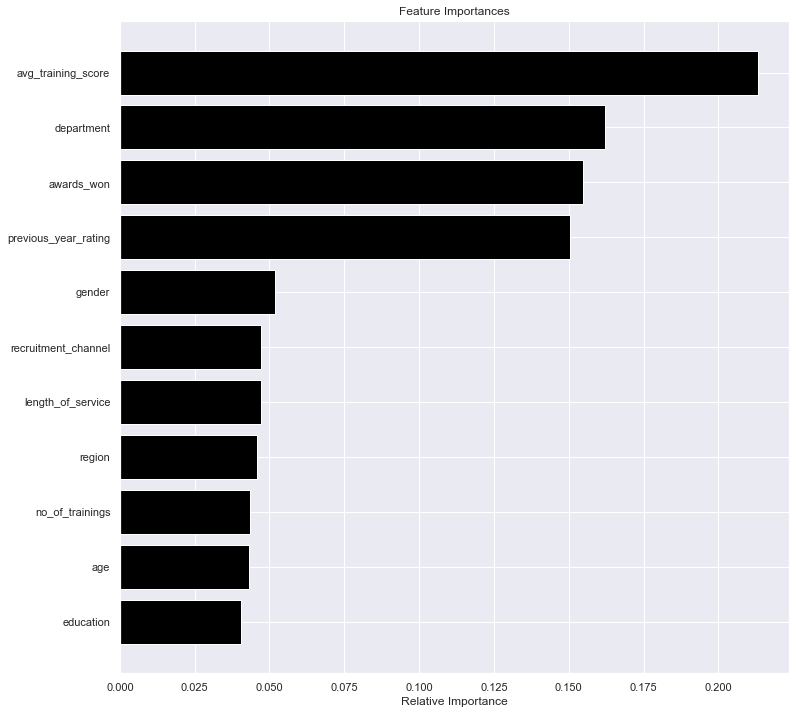

In [128]:
feature_names = X_train.columns
importances = tuned_xgb1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="black", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Best model using pipeline

In [129]:
tuned_xgb1 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.8,
    scale_pos_weight=1,
    n_estimators=100,
    learning_rate=0.1,
    gamma=5,
)
tuned_xgb1.fit(X_train_sc, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=6,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [130]:
from sklearn.pipeline import Pipeline
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        
        ("GBM",
         XGBClassifier(
        random_state=1,
        eval_metric="logloss",
        subsample=0.8,
        scale_pos_weight=1,
        n_estimators=100,
        learning_rate=0.1,
        gamma=5,
    ),
        ),
    ]
)
# Fit the model on training data
model.fit(X_train_sc, y_train)

Pipeline(steps=[('GBM',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eval_metric='logloss', gamma=5, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.1, max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=6, num_parallel_tree=1, predictor='auto',
                               random_state=1, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=0.8,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [131]:
get_metrics_score(model)

Accuracy on training set :  0.9413267300925322
Accuracy on test set :  0.9400960895213769
Recall on training set :  0.3274173806609547
Recall on test set :  0.3192857142857143
Precision on training set :  0.9528049866429208
Precision on test set :  0.9331941544885177
Recall Score on traininig set :  0.3274173806609547
Recall Score on testing set :  0.3192857142857143
f1 score on train:  0.4873605101343657
f1 score on test :  0.47578499201703034
accurace score on train :  0.9413267300925322
accurace score on test :  0.9400960895213769
Cross val score on train :  0.9407793561840219
Cross val score on test :  0.9378459237789609


[0.9413267300925322,
 0.9400960895213769,
 0.3274173806609547,
 0.3192857142857143,
 0.9528049866429208,
 0.9331941544885177,
 0.3274173806609547,
 0.3192857142857143,
 0.4873605101343657,
 0.47578499201703034]

## Conclusion and Recommendations

people who got awards last year had higher chances to get promoted. almost 80 percent of people who got award last year got promotion. people who have masters or higher degree have higher chance to get promoted. there were about 2.5k data were missing on education and i make a columns with those data and i named as unknown. on previous rating where null values i guess that were the data for new employee who join this year so last year they didnt have any score or ratings. on avg training score i treat data as same. 

our baseline score was 91.5 percent. so about 8.5 percent people got promotion last year. so there is high imbalance on this data. thats why our model worked poor on recall score. but my model work best on accuracy precision score. so i am confident my model will work best on predicting promotion for employee. 



